## Obesity Trends

Obesity is a worldwide problem which causes a lot of serious medical problems. Obesity will be increased, about 45% out of the whole population by 2035. The proportion of morbid obese and the actual costs on healthcare will be increased. Implementation of a system that could estimate the percentage of obese population for particular time duration given the age range, income range, location, high confidence level and low confidence level of obesity, education, gender, the class level, etc. of the population can help in fight against obesity.



Build a machine learning model to estimate the percentage of obese population.



Dataset Link: https://www.kaggle.com/spittman1248/cdc-data-nutrition-physical-activity-obesity

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv(r"C:\Users\Windows 11\Downloads\obesity.csv")

In [62]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [64]:
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [65]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [66]:
df.LocationDesc.value_counts()

Missouri                1008
Oklahoma                1008
Montana                 1008
Nebraska                1008
Nevada                  1008
New Hampshire           1008
New Jersey              1008
New Mexico              1008
New York                1008
North Carolina          1008
North Dakota            1008
Ohio                    1008
Oregon                  1008
Mississippi             1008
Pennsylvania            1008
Wisconsin               1008
Rhode Island            1008
South Carolina          1008
South Dakota            1008
Tennessee               1008
Texas                   1008
Utah                    1008
Vermont                 1008
Virginia                1008
National                1008
Minnesota               1008
Washington              1008
Wyoming                 1008
Alaska                  1008
Arizona                 1008
Arkansas                1008
California              1008
Connecticut             1008
Colorado                1008
Delaware      

In [67]:
df.Class.value_counts()

Physical Activity          26628
Obesity / Weight Status    17920
Fruits and Vegetables       8844
Name: Class, dtype: int64

In [68]:
df.ClassID.value_counts()

PA     26628
OWS    17920
FV      8844
Name: ClassID, dtype: int64

In [69]:
df['StratificationCategory1'].value_counts()

Race/Ethnicity    15256
Income            13349
Age (years)       11438
Education          7628
Gender             3814
Total              1907
Name: StratificationCategory1, dtype: int64

In [70]:
df['Question'].value_counts()

Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                               8960
Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                          8960
Percent of adults who engage in no leisure-time physical activity                                                                                                                                                                                        8932
Percent of adults who report consuming vegetables less than one time daily                                                                                                                                                                    

In [71]:
class_d = pd.get_dummies(df["ClassID"],prefix="ClassID")

In [72]:
df = df.select_dtypes(exclude="object")

In [73]:
df = pd.concat([df,class_d],axis=1)

In [74]:
df.head()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,ClassID_FV,ClassID_OWS,ClassID_PA
0,2011,2011,NaN,32.0,32.0,30.5,33.5,7304.0,1,0,1,0
1,2011,2011,NaN,32.3,32.3,29.9,34.7,2581.0,1,0,1,0
2,2011,2011,NaN,31.8,31.8,30.0,33.6,4723.0,1,0,1,0
3,2011,2011,NaN,33.6,33.6,29.9,37.6,1153.0,1,0,1,0
4,2011,2011,NaN,32.8,32.8,30.2,35.6,2402.0,1,0,1,0


In [75]:
df.isnull().sum()

YearStart                     0
YearEnd                       0
Data_Value_Unit           53392
Data_Value                 5046
Data_Value_Alt             5046
Low_Confidence_Limit       5046
High_Confidence_Limit      5046
Sample_Size                5046
LocationID                    0
ClassID_FV                    0
ClassID_OWS                   0
ClassID_PA                    0
dtype: int64

In [76]:
df = df.drop(["Data_Value_Unit"],axis=1)

In [77]:
df.head()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,ClassID_FV,ClassID_OWS,ClassID_PA
0,2011,2011,32.0,32.0,30.5,33.5,7304.0,1,0,1,0
1,2011,2011,32.3,32.3,29.9,34.7,2581.0,1,0,1,0
2,2011,2011,31.8,31.8,30.0,33.6,4723.0,1,0,1,0
3,2011,2011,33.6,33.6,29.9,37.6,1153.0,1,0,1,0
4,2011,2011,32.8,32.8,30.2,35.6,2402.0,1,0,1,0


In [78]:
df.dropna(inplace=True)

In [79]:
df.isnull().sum()

YearStart                 0
YearEnd                   0
Data_Value                0
Data_Value_Alt            0
Low_Confidence_Limit      0
High_Confidence_Limit     0
Sample_Size               0
LocationID                0
ClassID_FV                0
ClassID_OWS               0
ClassID_PA                0
dtype: int64

In [80]:
df[df["Data_Value"]==df["Data_Value_Alt"]]

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,ClassID_FV,ClassID_OWS,ClassID_PA
0,2011,2011,32.0,32.0,30.5,33.5,7304.0,1,0,1,0
1,2011,2011,32.3,32.3,29.9,34.7,2581.0,1,0,1,0
2,2011,2011,31.8,31.8,30.0,33.6,4723.0,1,0,1,0
3,2011,2011,33.6,33.6,29.9,37.6,1153.0,1,0,1,0
4,2011,2011,32.8,32.8,30.2,35.6,2402.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,2016,13.3,13.3,8.0,21.2,212.0,78,0,0,1
53383,2016,2016,25.3,25.3,16.4,37.0,137.0,78,0,0,1
53384,2016,2016,18.3,18.3,10.8,29.2,154.0,78,0,0,1
53385,2016,2016,24.1,24.1,19.9,28.9,820.0,78,0,0,1


In [81]:
df = df.drop("Data_Value_Alt",axis=1)

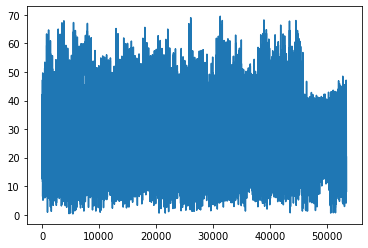

In [82]:
plt.plot("Low_Confidence_Limit",data = df)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Data_Value', ylabel='Density'>

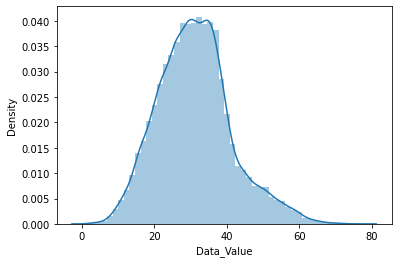

In [83]:
sns.distplot(df.Data_Value)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Low_Confidence_Limit', ylabel='Density'>

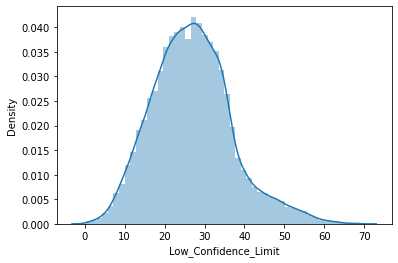

In [84]:
sns.distplot(df.Low_Confidence_Limit)

In [85]:
x = df.drop(["Data_Value","Sample_Size","YearStart","YearEnd"],axis =1).values
y = df.Data_Value.values

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [89]:
lr.score(x_test,y_test)

0.9988292011858355

In [45]:
lr.intercept_

31.15518703552072

In [55]:
y_pred = lr.predict(x_test)

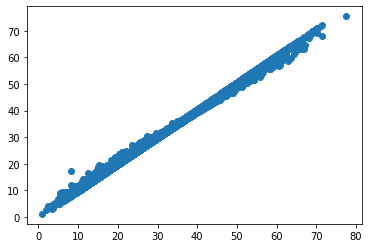

In [56]:
plt.scatter(y_test,y_pred)

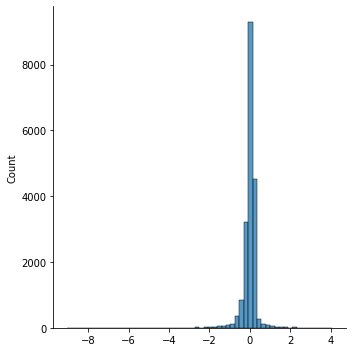

In [57]:
sns.displot((y_test-y_pred),bins=60)

In [48]:
from sklearn import metrics

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.19292303125888183
MSE: 0.12415489936664874
RMSE: 0.352356210909711


In [59]:
lr.score(x_test,y_test)

0.9988292011858355